In [24]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [22]:
# Read the dataset into a DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'
df = pd.read_csv(url, encoding='latin-1')

# Data set is for "Traffic Flow Forecasting Data Set" : Abstract: The task for this dataset is to forecast the spatio-temporal traffic volume based on the historical traffic volume and other features in neighboring locations.




In [23]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [25]:
df.size

471744

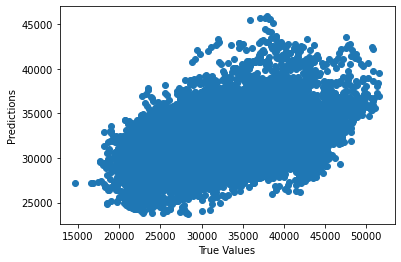

In [26]:

# Select the features and target variable
X = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y = df['Zone 1 Power Consumption']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Visualize the results using a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [51]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

# Relationships between variables in our dataset:

To find some relationship between the wind speed, temperature, humidity, and power consumption in our dataset, see the process below:

In [50]:
#@title Default title text
import pandas as pd
import seaborn as sns

# Read the dataset into a DataFrame
#df = pd.read_csv('dataset.csv')

# Create a pairplot using Seaborn
sns.pairplot(df, x_vars=['Humidity'], y_vars='DateTime', kind='reg', hue='DateTime')
plt.legend(loc='upper right')

# Show the plot
plt.show()


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6b46175d30> (for post_execute):


KeyboardInterrupt: ignored

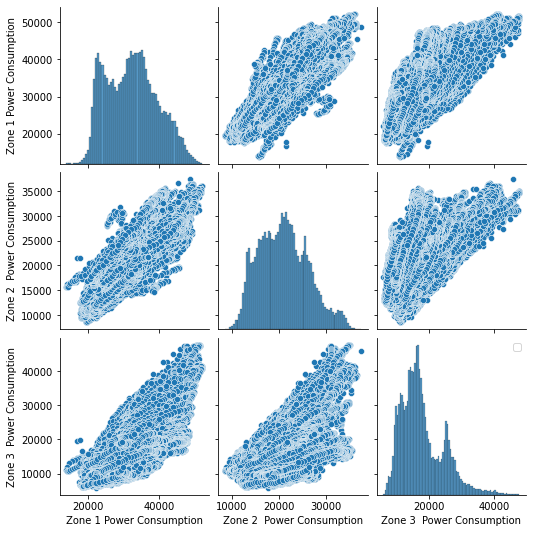

In [60]:
import matplotlib.pyplot as plt
# Select the power consumption columns
power_consumption = df[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

# Create a pairplot using Seaborn
sns.pairplot(power_consumption)

# Show the plot
plt.show()

In [46]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

To evaluate the performance of our linear regression model on test data, we use the mean squared error (MSE) and the R-squared (R2) metrics.

The MSE is a measure of the average squared difference between the predicted values and the true values. It is calculated as the sum of the squared differences between the predicted values and the true values, divided by the number of samples. A lower MSE indicates a better fit of the model to the data.

The R2 is a measure of the goodness of fit of the model to the data. It is calculated as the squared correlation between the predicted values and the true values. An R2 value of 1 indicates a perfect fit of the model to the data, and an R2 value of 0 indicates a poor fit of the model to the data.

To calculate our MSE and R2 for a linear regression model in Python, we can use the mean_squared_error() and r2_score() functions from the sklearn.metrics module. Here is an example of how we could use these functions to evaluate the performance of our linear regression model on test data:

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2
r2 = r2_score(y_test, y_pred)


# Print the results
print('MSE:', mse)


# Print the results
print('R2:', r2)





MSE: 40217776.50879474
R2: 0.21347921492697763


In general, the MSE is considered to be too high if it is significantly larger than the variance of the true values. 

This would indicate that our model is not fitting the data well, and the predictions are far off from the true values.

To determine whether the MSE value above is too high, we will compare it to the variance of the true values. If the MSE is significantly larger than the variance, then the model is not fitting the data well. See the code below comparing variance using our target variable "Zone 1 power consumption".

In [57]:

# Select the power consumption in Zone 1 column as the target variable
y = df['Zone 1 Power Consumption']

# Calculate the variance of the true values
variance = y.var()

# Print the variance
print(variance)

50844922.481950335


---

- Our variance is 50.8 million
- Our MSE is 40.2 million.

---

Difference is about 10.6 million

In [59]:
print(variance - mse)

10627145.973155595


So, since our variance is larger than our MSE, this indicates that the model is fitting the data well! 😂

It is worth noting that there is no specific threshold for the MSE or the variance that determines whether a model is fitting the data well. The appropriate threshold will depend on the specific context and the goals of the analysis. However, in general, a lower MSE and a larger variance are both indicative of a better fit of the model to the data.

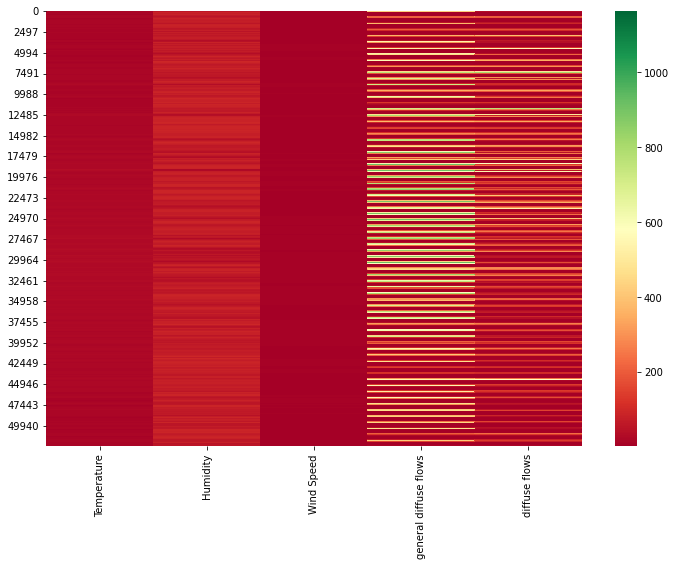

In [67]:
# Select the columns to include in the heatmap
columns = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']

# Create a heatmap using Seaborn
ax = sns.heatmap(df[columns], cmap='RdYlGn')

# Set the size of the heatmap
ax.figure.set_size_inches(12, 8)

# Show the plot
plt.show()
